__Notes__

-https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction

- You can also download all the data for those who were rejected for loans from https://www.kaggle.com/wordsforthewise/lending-club?select=rejected_2007_to_2018Q4.csv.gz

- They stopped publishing rejected data in 2019 which had the following features:
    - 'Amount Requested', 
    - 'Application Date', 
    - 'Loan Title', 
    - 'Risk_Score',
    - 'Debt-To-Income Ratio', 
    - 'Zip Code', 
    - 'State', 
    - 'Employment Length',
    - 'Policy Code'

In [1]:
import pandas as pd

full_df = pd.read_csv("../Data/LCData/Loan_status_2007-2020Q3.gzip")

C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 1000
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()
info = pd.read_excel("../Data/LCData/LCDataDictionary.xlsx")
info = info[['LoanStatNew','Description']].iloc[0:-2]
display(info)
pd.reset_option('all')

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\pandas\_config\config.py:620: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\pandas\_config\config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [3]:
full_df['loan_status'].value_counts()

Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: loan_status, dtype: int64

Lets just take the data for those "Fully Paid" and those "Charged Off"

In [18]:
bin_full_df = full_df[full_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
bin_full_df['loan_status'].value_counts()

Fully Paid     1497783
Charged Off     362548
Name: loan_status, dtype: int64

Now lets look at the percent of missing data is in each column to help inform us which ones we may want to use for my example data.

In [19]:
set_pandas_display_options()
nas = bin_full_df.isna().sum()
per_nas = ((nas/len(bin_full_df))*100).round(2)
display(per_nas)
pd.reset_option('all')

Unnamed: 0                                      0.00
id                                              0.00
loan_amnt                                       0.00
funded_amnt                                     0.00
funded_amnt_inv                                 0.00
term                                            0.00
int_rate                                        0.00
installment                                     0.00
grade                                           0.00
sub_grade                                       0.00
emp_title                                       7.07
emp_length                                      6.30
home_ownership                                  0.00
annual_inc                                      0.00
verification_status                             0.00
issue_d                                         0.00
loan_status                                     0.00
pymnt_plan                                      0.00
url                                           

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\pandas\_config\config.py:620: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\pandas\_config\config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


Lets say if its above 10% missing data then we'll keep it out of the features we should choose for our example. Also we'll drop `Unnamed: 0`

In [20]:
red_feats = list(per_nas[per_nas<10].index)
bin_full_df = bin_full_df[red_feats]
bin_full_df = bin_full_df.drop('Unnamed: 0', axis=1)
bin_full_df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,Senior Escrow Officer,...,87.5,0.0,1.0,1.0,103322.0,60812.0,28200.0,64422.0,N,N
2925489,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,Rn,...,92.6,14.3,0.0,0.0,132303.0,55863.0,34800.0,70203.0,N,N
2925490,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,Sales Associate,...,95.2,0.0,0.0,0.0,30400.0,14300.0,9000.0,0.0,N,N
2925491,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,Contact input,...,94.4,0.0,0.0,0.0,47476.0,26201.0,8100.0,34076.0,N,N


Although I'm sure grade is going to be useful as can be seen in the plot below, this is based probably on similar information so we'll drop it.

> Lending Club Proprietary Model Ranking
>
> If an application passes the initial credit screening criteria, the characteristics of the application are assessed by Lending Club’s proprietary scoring models which can either decline or approve the applicant. The initial scoring model provides the application with a score, which when combined with the applicant’s FICO score and certain other credit attributes arrives at a Model Rank. The Model Rank is based upon an internally developed algorithm which analyzes the performance of borrower members and takes into account FICO score, credit attributes, and other application data. The Model Rank is between 1 and 25 and corresponds to a Base Risk Sub-Grade as follows

https://www.lendingclub.com/foliofn/rateDetail.action

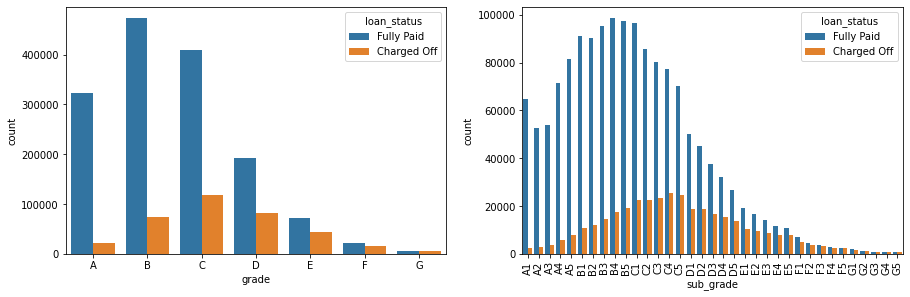

In [21]:
# copied from https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(bin_full_df.grade.unique().tolist())
sns.countplot(x='grade', data=bin_full_df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(bin_full_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=bin_full_df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [22]:
bin_full_df = bin_full_df.drop(['grade','sub_grade'], axis=1)

Lets weed out some repeated information - some varibles may be just telling us the same thing. I'll just drop the obvious ones

<AxesSubplot:>

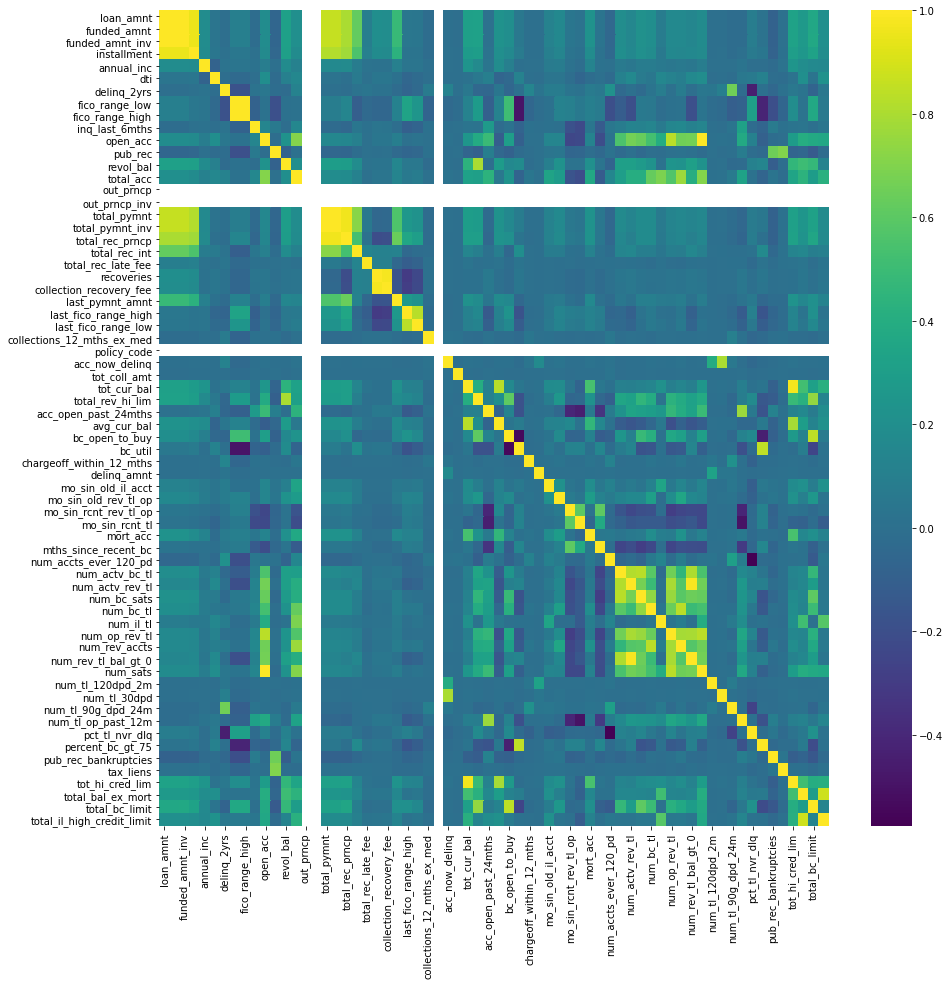

In [36]:
plt.figure(figsize=(15, 15))
sns.heatmap(bin_full_df.corr(), cmap='viridis')

First thing I can see is that there are a number of varibles giving us similar info around the payment so lets only pick the one we know when an applicant asks for a loan, `loan_amnt`.

In [45]:
loan_info = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']

display(bin_full_df[loan_info].head())
bin_full_df = bin_full_df.drop(loan_info[1:], axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
0,5000.0,5000.0,4975.0,5863.155187,5833.84,5000.00
1,2500.0,2500.0,2500.0,1014.530000,1014.53,456.46
2,2400.0,2400.0,2400.0,3005.666844,3005.67,2400.00
3,10000.0,10000.0,10000.0,12231.890000,12231.89,10000.00
4,3000.0,3000.0,3000.0,4066.908161,4066.91,3000.00


`loan_amnt` and `installment` are also highly correlated. Not too surprising as these are linked as detailed on: https://www.lendingclub.com/foliofn/rateDetail.action

We will keep these two in to demonstrate highly correlated features in importance values tho.

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

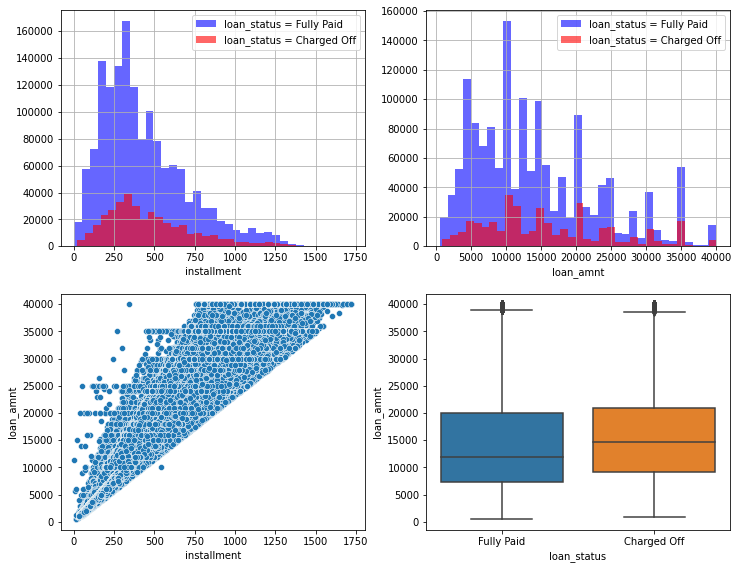

In [40]:
# https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction

plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
bin_full_df[bin_full_df["loan_status"] == "Fully Paid"]["installment"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
bin_full_df[bin_full_df["loan_status"] == "Charged Off"]["installment"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("installment")

plt.subplot(4, 2, 2)
bin_full_df[bin_full_df["loan_status"] == "Fully Paid"]["loan_amnt"].hist(bins=35, color='blue', label='loan_status = Fully Paid', alpha=0.6)
bin_full_df[bin_full_df["loan_status"] == "Charged Off"]["loan_amnt"].hist(bins=35, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("loan_amnt")

plt.subplot(4, 2, 3)
sns.scatterplot(x='installment', y='loan_amnt', data=bin_full_df)

plt.subplot(4, 2, 4)
sns.boxplot(x='loan_status', y='loan_amnt', data=bin_full_df)
plt.show()

...and for getting this done in time now I'll just pick 20 or so.

In [59]:
options = list(bin_full_df.columns)
options.remove('total_rev_hi_lim')

In [62]:
options = list(bin_full_df.columns)
options.remove('total_rev_hi_lim')
set_pandas_display_options()
display(info.set_index('LoanStatNew').loc[options].sort_index())
pd.reset_option('all')

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
annual_inc,The self-reported annual income provided by the borrower during registration.
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.
bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
chargeoff_within_12_mths,Number of charge-offs within 12 months


As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\pandas\_config\config.py:620: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\pandas\_config\config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [69]:
keep = ['loan_status', 'loan_amnt','int_rate','annual_inc','dti','total_acc',
        'term','home_ownership','emp_length','open_acc','pub_rec','pub_rec_bankruptcies',
        'mort_acc', 'avg_cur_bal', 'delinq_amnt', 'fico_range_high', 'fico_range_low', 'num_bc_tl',
        'num_tl_90g_dpd_24m', 'zip_code', 'installment'
       ]
set_pandas_display_options()
display(info.set_index('LoanStatNew').loc[keep].sort_index())
pd.reset_option('all')

,Description
LoanStatNew,
annual_inc,The self-reported annual income provided by the borrower during registration.
avg_cur_bal,Average current balance of all accounts
delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
installment,The monthly payment owed by the borrower if the loan originates.


As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\pandas\_config\config.py:620: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
C:\Users\delliot2\.conda\envs\mlp_pip\lib\site-packages\pandas\_config\config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


Github has a file limit of 100MB so thats my aim

In [74]:
bin_red_df = bin_full_df[keep]
bin_red_df = bin_red_df.dropna()
bin_red_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677521 entries, 42536 to 2925492
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_status           1677521 non-null  object 
 1   loan_amnt             1677521 non-null  float64
 2   int_rate              1677521 non-null  object 
 3   annual_inc            1677521 non-null  float64
 4   dti                   1677521 non-null  float64
 5   total_acc             1677521 non-null  float64
 6   term                  1677521 non-null  object 
 7   home_ownership        1677521 non-null  object 
 8   emp_length            1677521 non-null  object 
 9   open_acc              1677521 non-null  float64
 10  pub_rec               1677521 non-null  float64
 11  pub_rec_bankruptcies  1677521 non-null  float64
 12  mort_acc              1677521 non-null  float64
 13  avg_cur_bal           1677521 non-null  float64
 14  delinq_amnt           1677521 

In [106]:
X = bin_red_df.drop('loan_status', axis=1).values
y = bin_red_df['loan_status'].values

I'll take a 1/3 of the data

In [124]:
from sklearn.model_selection import StratifiedShuffleSplit
SSS = StratifiedShuffleSplit(n_splits=1, train_size= 0.33, random_state=42)
split_index = SSS.split(X, y)
for i, (train_index, test_index) in enumerate(split_index):
    if i == 0:
        red_X = X[train_index]
        red_y = y[train_index]
    else:
        continue

In [125]:
reduced_df = pd.DataFrame(red_X, columns = [list(bin_red_df.drop('loan_status', axis=1).columns)])
reduced_df['loan_status'] = red_y
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553581 entries, 0 to 553580
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   (loan_amnt,)             553581 non-null  object
 1   (int_rate,)              553581 non-null  object
 2   (annual_inc,)            553581 non-null  object
 3   (dti,)                   553581 non-null  object
 4   (total_acc,)             553581 non-null  object
 5   (term,)                  553581 non-null  object
 6   (home_ownership,)        553581 non-null  object
 7   (emp_length,)            553581 non-null  object
 8   (open_acc,)              553581 non-null  object
 9   (pub_rec,)               553581 non-null  object
 10  (pub_rec_bankruptcies,)  553581 non-null  object
 11  (mort_acc,)              553581 non-null  object
 12  (avg_cur_bal,)           553581 non-null  object
 13  (delinq_amnt,)           553581 non-null  object
 14  (fico_range_high,)  

In [126]:
reduced_df.to_csv('../Data/LCData/LC_reduced.csv')